This tutorial explores a few methods for dimensionality reduction of a data set, including Principal Component Analysis, t-distributed Stochastic Neighbor Embedding, and . 

The original source code with explanations can be found [here](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

The Iris data set is loaded directly into a pandas dataframe from the URL.

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width', 'target'])

In [14]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Because PCA is dependent on the scale of the features, each feature must be normalized in order to properly obtain the principal components.

In [22]:
features = ['sepal length','sepal width','petal length','petal width']

x = df.drop('target', axis=1).values
y = df['target'].values

x = StandardScaler().fit_transform(x)

In [27]:
p_comps = PCA(n_components=2).fit_transform(x)

p_df= pd.DataFrame(data = p_comps,
                  columns=['PrincipalComponent1', 'PrincipalComponent2'])

final_df = pd.concat([p_df, df[['target']]], axis=1)

Plotting PCA results:

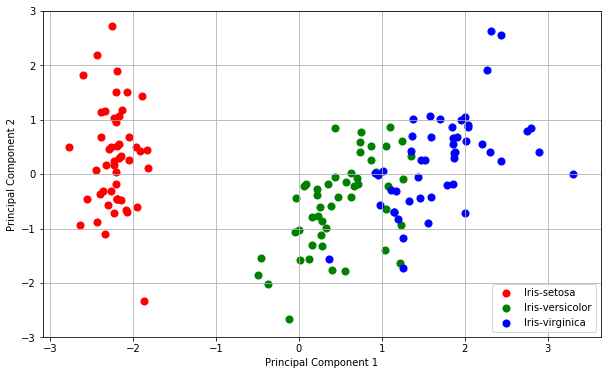

In [37]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PrincipalComponent1'], 
               final_df.loc[indicesToKeep, 'PrincipalComponent2'], 
               c = color, 
               s = 50)
    
ax.legend(targets)
ax.grid()

Comparing PCA results to t-SNE (non-linear, non-deterministic method):

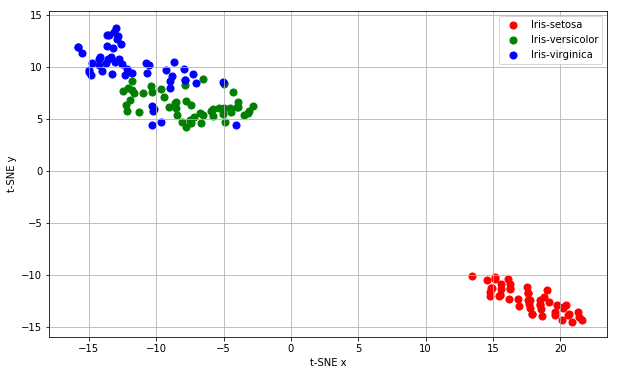

In [76]:
x_embedded = TSNE(n_components=2).fit_transform(x)
sne_df = pd.DataFrame(data=x_embedded, columns=['Column1', 'Column2'])
sne_df['target'] = df['target'].values

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE x')
ax.set_ylabel('t-SNE y')
ax.grid()

for i, target in enumerate(targets):
    ax.scatter(sne_df[sne_df['target'] == target]['Column1'].values,
               sne_df[sne_df['target'] == target]['Column2'].values,
               c = colors[i],
               s = 50)
    
ax.legend(targets)

Due to t-SNE being non-deterministic, its results vary with each run. Nevertheless, in the case of this data set, the results are comparable to those achieved using PCA.

Even with dimensionality reduction, two of the three iris types are fairly close together when viewed in 2D space. The same methods will be applied one more time, only this time in three dimensions.

PCA in 3D (generating three principal components):

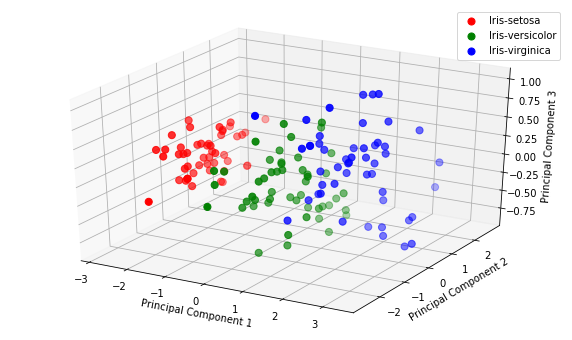

In [81]:
p_comps = PCA(n_components=3).fit_transform(x)

p_df= pd.DataFrame(data = p_comps,
                  columns=['PrincipalComponent1', 'PrincipalComponent2', 'PrincipalComponent3'])

final_df = pd.concat([p_df, df[['target']]], axis=1)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PrincipalComponent1'], 
               final_df.loc[indicesToKeep, 'PrincipalComponent2'],
               final_df.loc[indicesToKeep, 'PrincipalComponent3'],
               c = color, 
               s = 50)
    
ax.legend(targets)
ax.grid()

t-SNE in 3D:

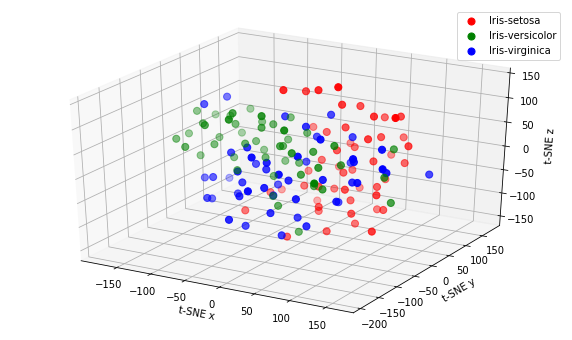

In [84]:
x_embedded = TSNE(n_components=3).fit_transform(x)
sne_df = pd.DataFrame(data=x_embedded, columns=['Column1', 'Column2', 'Column3'])
sne_df['target'] = df['target'].values

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('t-SNE x')
ax.set_ylabel('t-SNE y')
ax.set_zlabel('t-SNE z')
ax.grid()

for i, target in enumerate(targets):
    ax.scatter(sne_df[sne_df['target'] == target]['Column1'].values,
               sne_df[sne_df['target'] == target]['Column2'].values,
               sne_df[sne_df['target'] == target]['Column3'].values,
               c = colors[i],
               s = 50)
    
ax.legend(targets)

In 3D, it appears that t-SNE produces data which is more mixed up than PCA.